### 1. Setup

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### 2. Data Loading

In [42]:
netflix_db = pd.read_csv('../Datasets/netflix_titles.csv')
netflix_db.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### 3. Performing EDA

In [43]:
print('------ Data Set Info ------\n')
netflix_db.info()
print('\n ------ Description: ------\n',netflix_db.describe())

------ Data Set Info ------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB

 ------ Description: ------
        release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


In [44]:
netflix_db.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Insight:
- Director, Cast and Country has high number of null values, due to high count we can't discard the data.
- For Director and Cast we will fill "unknown" 

In [45]:
netflix_db['director'] = netflix_db['director'].fillna('unknown')
netflix_db['cast'] = netflix_db['cast'].fillna('Unknown')
netflix_db['country'] = netflix_db['country'].fillna(netflix_db['country'].mode()[0])

Removing null data_added and rating as in total its only 17 records marking no significat change.

In [46]:
netflix_db = netflix_db[~netflix_db['date_added'].isna()]
netflix_db = netflix_db[~netflix_db['rating'].isna()]

In [47]:
netflix_db['date_added'] = pd.to_datetime(netflix_db['date_added'], format = 'mixed', dayfirst = False)

netflix_db['year_added'] = netflix_db['date_added'].dt.year
netflix_db['month_added'] = netflix_db['date_added'].dt.month

##### - Visializations

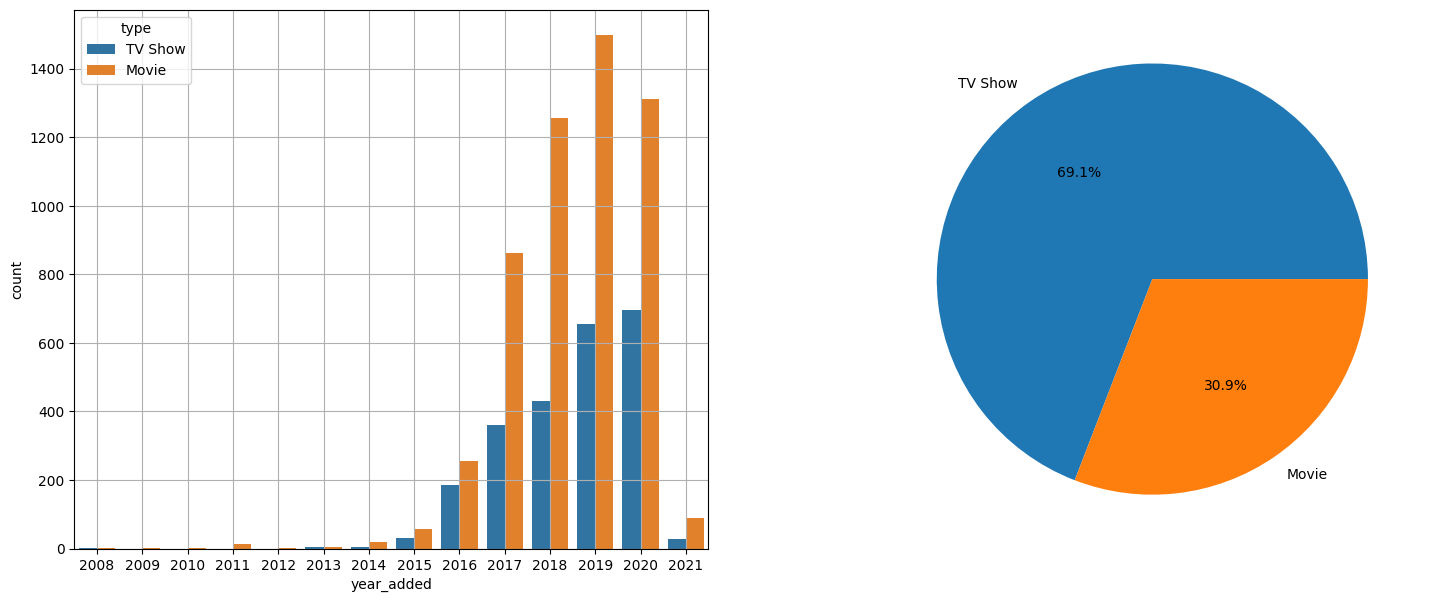

In [48]:
_, axis = plt.subplots(1,2, figsize=(18,7))

plt.subplot(1,2,1)
sns.countplot(data=netflix_db, x='year_added', hue='type')
plt.grid(True)

plt.subplot(1,2,2)
plt.pie(x=netflix_db['type'].value_counts(), labels=netflix_db['type'].unique(), autopct='%1.1f%%')
plt.show()

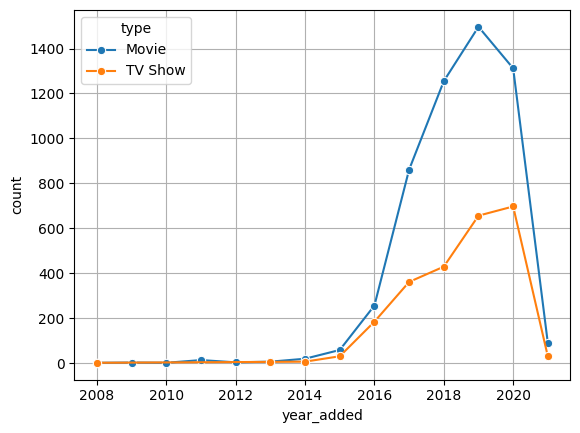

In [49]:
counts = netflix_db.groupby(['type', 'year_added']).size().reset_index(name='count')
sns.lineplot(data=counts, x='year_added', y='count', hue='type', marker='o')
plt.grid(True)

plt.show()

Insight:
- Before 2014 there was less to no new content on the platform. However, from 2016 to 2019 we can see a steep rise in the number of contents added on the plpatform. Movies peaking at 1500 new movies added to the catalogue.  
- Majority of the new contents where movies, which saw its peek in 2020 with around 700 new contents. After which both saw an sudden down fall in reaching below 100.

In [50]:
genres_df = netflix_db.assign(genre=netflix_db['listed_in'].str.split(', ')).explode('genre')

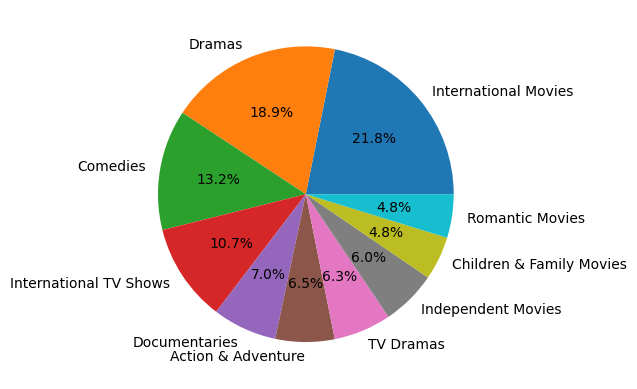

In [51]:
plt.pie(x=genres_df['genre'].value_counts()[:10], labels=genres_df['genre'].value_counts()[:10].index, autopct='%1.1f%%')
plt.show()

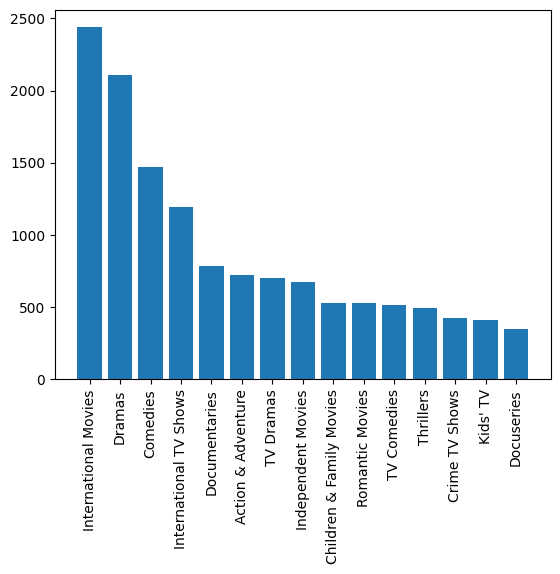

In [52]:
plt.bar(genres_df['genre'].value_counts()[:15].index, genres_df['genre'].value_counts()[:15].values)
plt.xticks(rotation=90)
plt.show()

Insight:
- international movies is the most common genre tag.


In [53]:
netflix_db.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


C:\Users\yashg\AppData\Local\Temp\ipykernel_17720\1443321857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_db['duration'] = movie_db['duration'].str.replace(' min','').astype(int)
C:\Users\yashg\AppData\Local\Temp\ipykernel_17720\1443321857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series_db['duration'] = series_db['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)


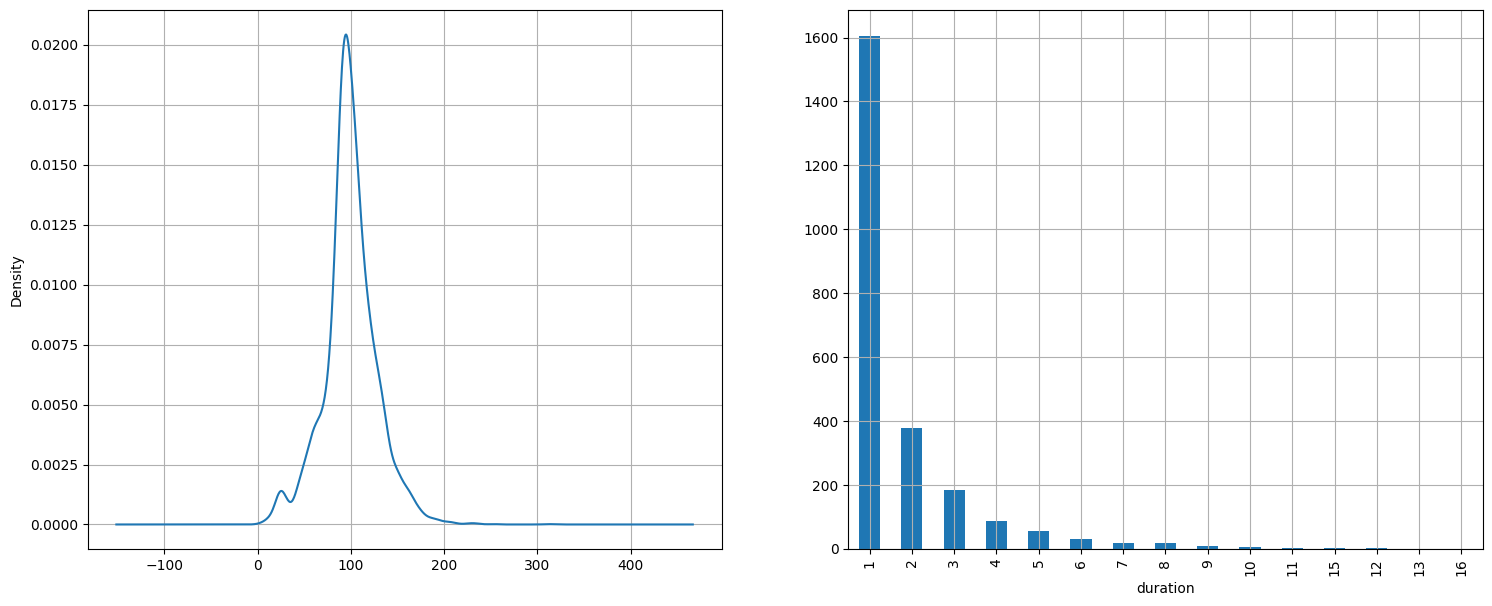

In [54]:
movie_db = netflix_db[netflix_db['type']=='Movie']
series_db = netflix_db[netflix_db['type']=='TV Show']

# converting duration for each to int fmt
movie_db['duration'] = movie_db['duration'].str.replace(' min','').astype(int)
series_db['duration'] = series_db['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)

_, axis = plt.subplots(1,2,figsize=(18,7))
movie_db['duration'].plot(ax=axis[0], kind='kde',grid=True)
series_db['duration'].value_counts()[:15].plot(ax=axis[1], kind='bar',grid=True)
plt.show()

Insight
- Majority of movies are of duration 90min to 120min.
- For Tv Show majority of shows only have a single season of it show casing less poplularity of it. 

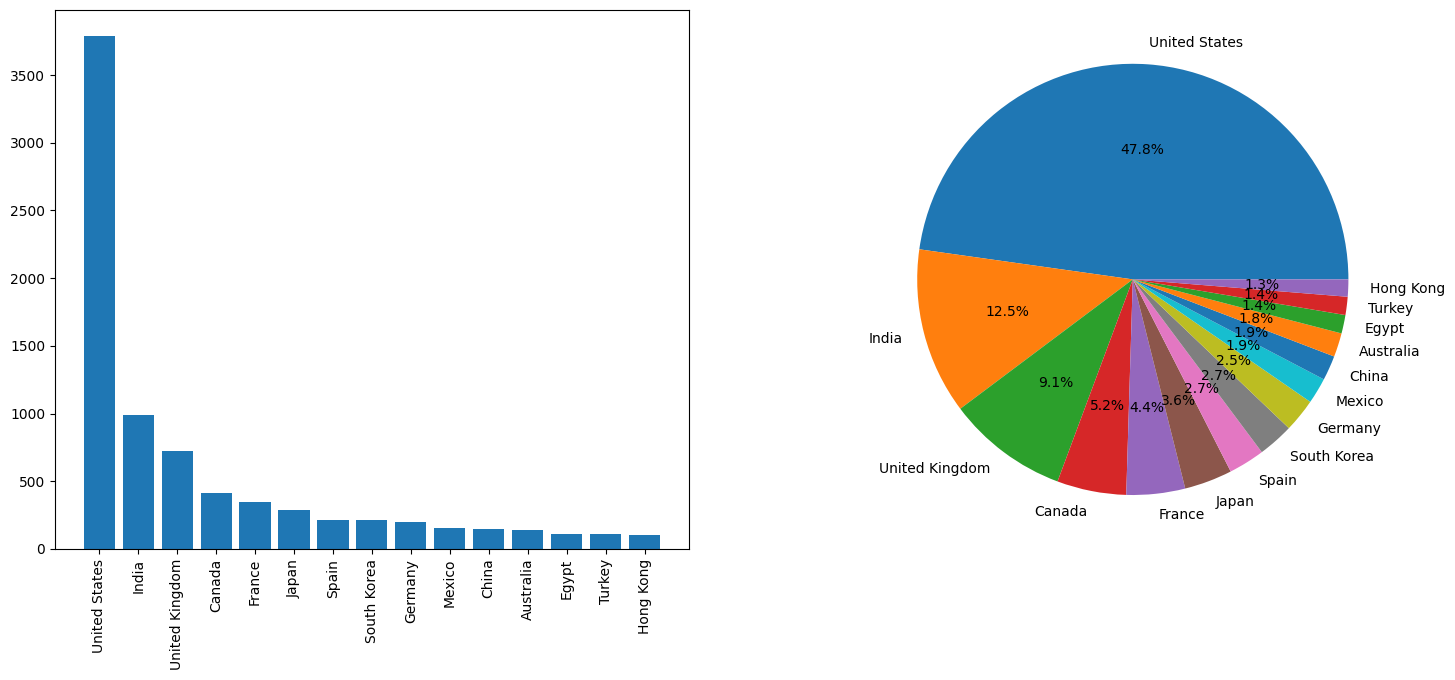

In [55]:
countries_df = netflix_db.assign(country=netflix_db['country'].str.split(', ')).explode('country')
_, axis = plt.subplots(1,2, figsize=(18,7))

plt.subplot(1,2,1)
plt.bar(countries_df['country'].value_counts()[:15].index, countries_df['country'].value_counts()[:15].values)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=countries_df['country'].value_counts()[:15], labels=countries_df['country'].value_counts()[:15].index, autopct='%1.1f%%')
plt.show()

Insight
- 

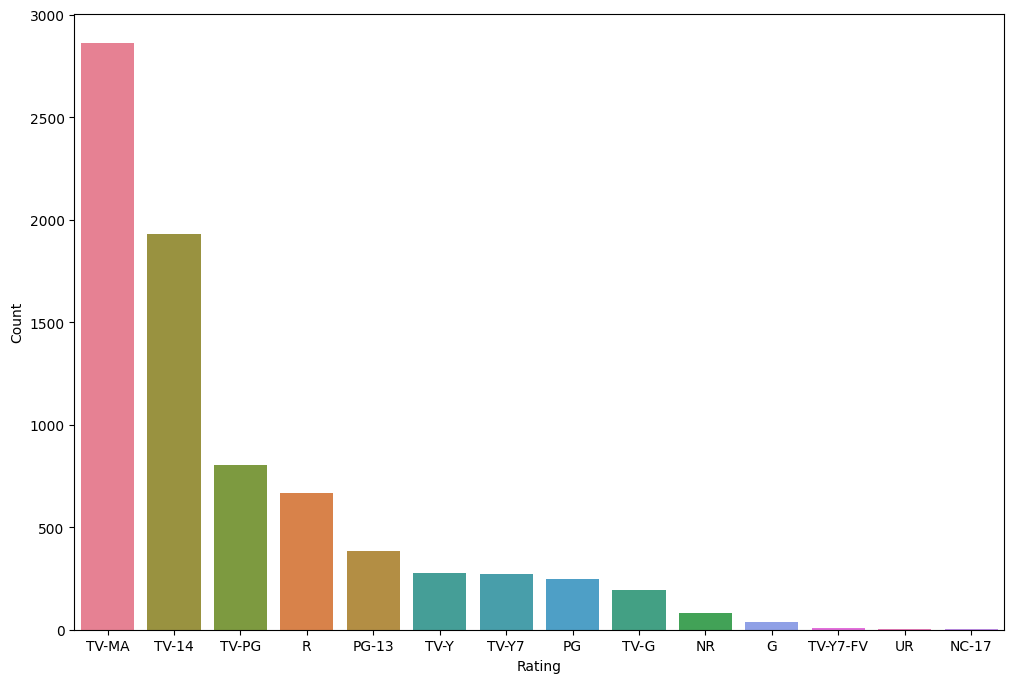

In [56]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_db, order=netflix_db['rating'].value_counts().index, hue='rating', legend=False)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Insight
- Majority number of contents avaialbe are for Mature Audience followed by 14+ and under parential supervision.

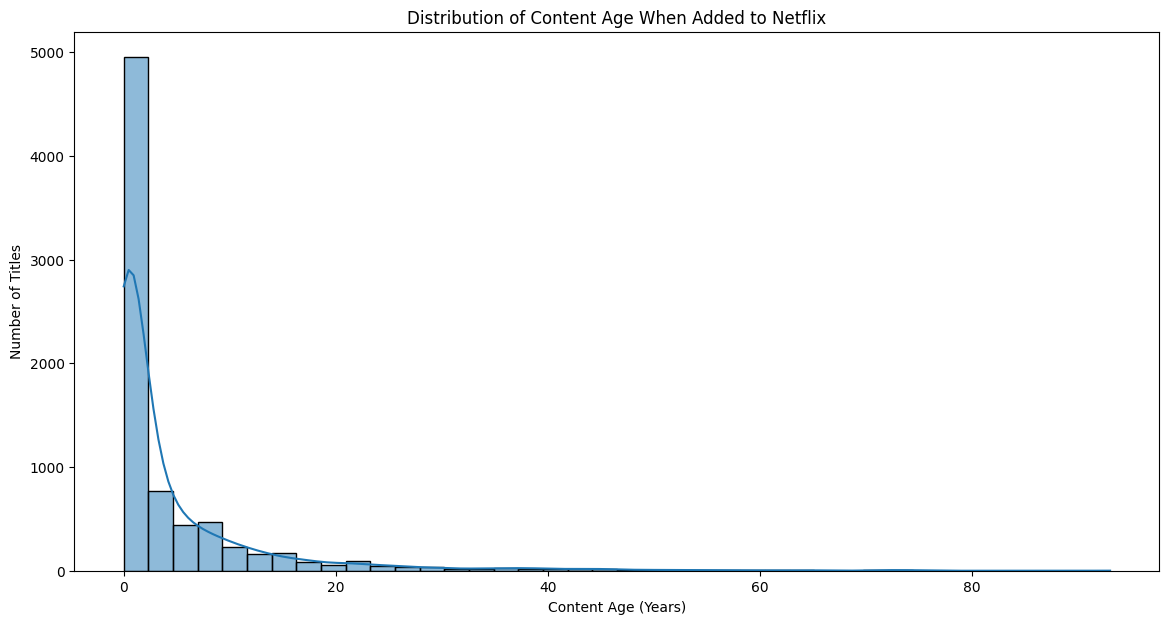

In [57]:
netflix_db['age_on_netflix'] = netflix_db['year_added'] - netflix_db['release_year']

content_age = netflix_db[netflix_db['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=40, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

Insight
- We can see the desity graph peeking at 0 shocasing that most of the newly released content is made avaiable in the same year.

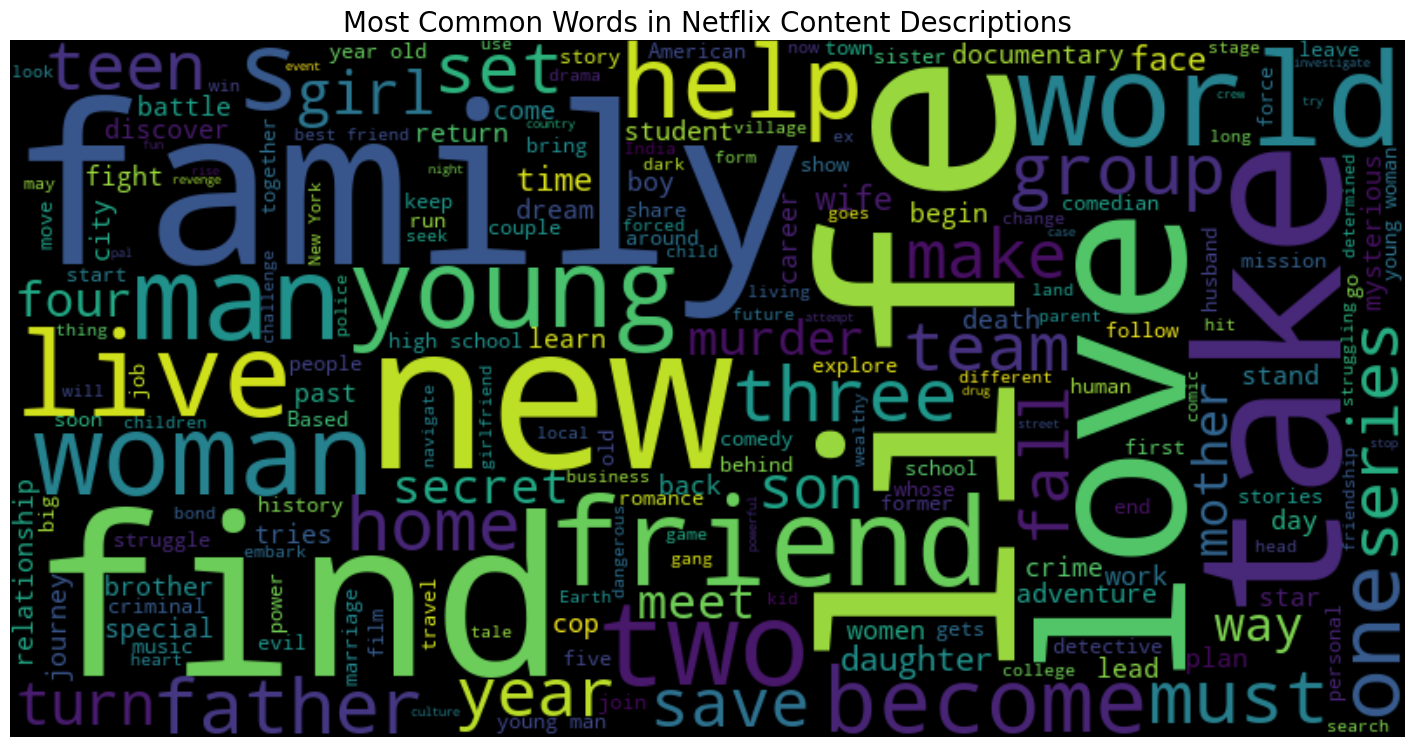

In [58]:
text = ' '.join(netflix_db['description'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

Q1: How has the distribution of content ratings changed over time?


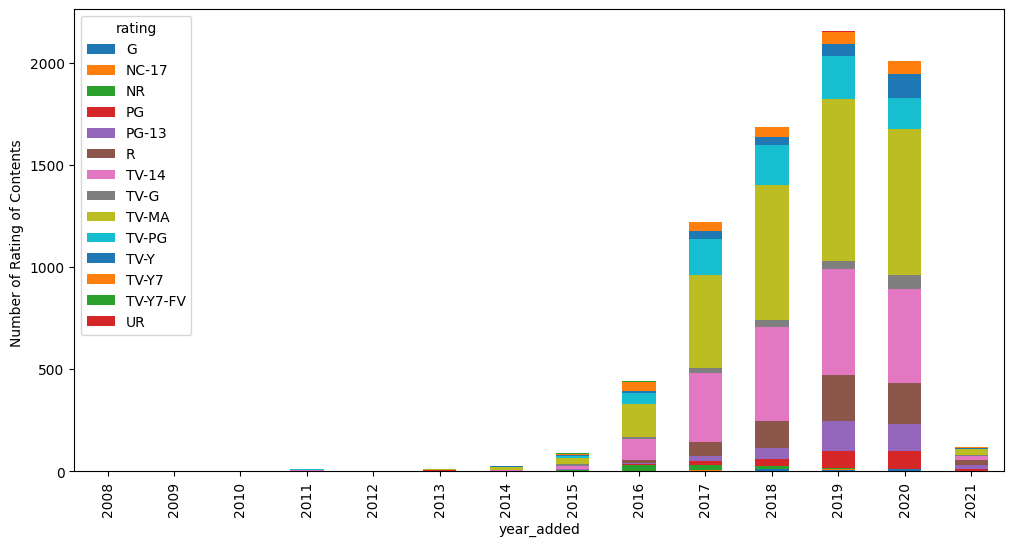

In [59]:
fig =figsize=(18,7)
netflix_db.groupby(['year_added','rating',]).size().unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('Number of Rating of Contents ')
plt.show()

- We can observer that the most of the contents are of type TV-MA, TV-PG and TV-14. Which shows an praportionate growth from 2014 till 2020.

Q2: Is there a relationship between content age and its type?

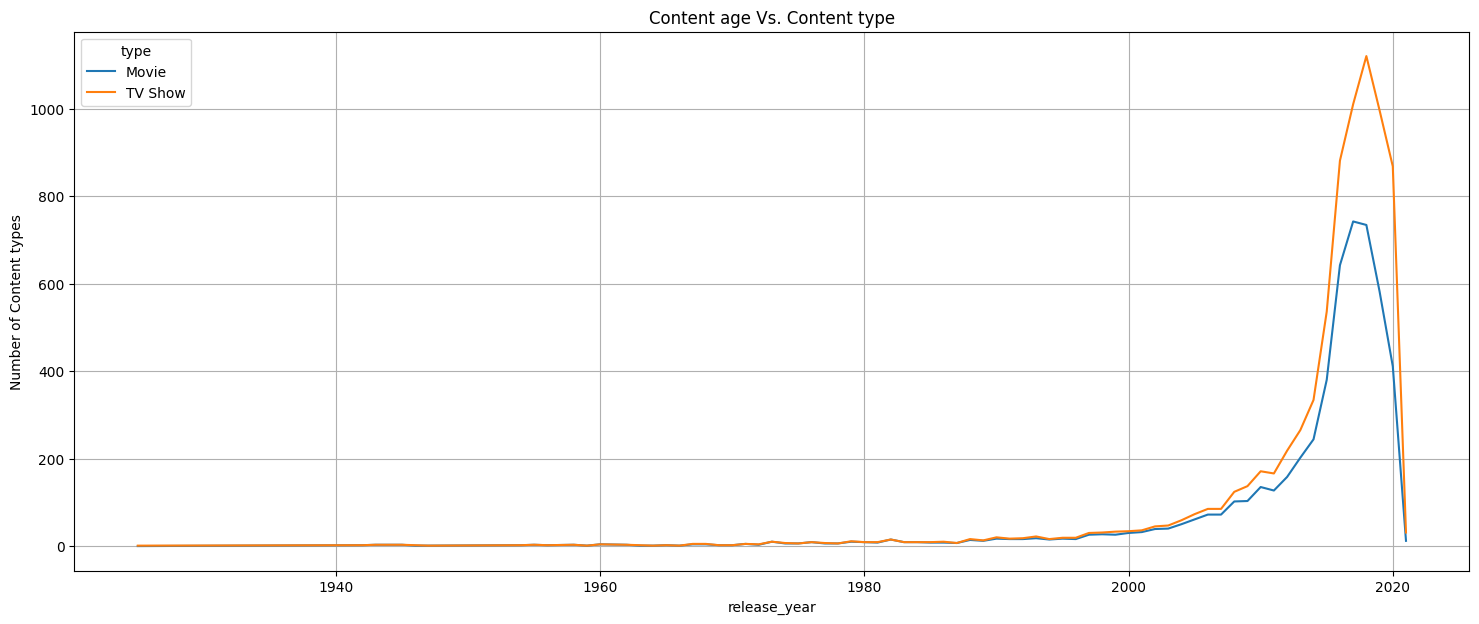

In [60]:
netflix_db.groupby(['release_year','type',]).size().unstack(fill_value=0).plot(kind='line', stacked=True, grid=True, figsize=(18,7))
plt.title("Content age Vs. Content type")
plt.ylabel('Number of Content types')
plt.show()

Q3: Can we identify any trends in content production based on the release year vs. the year added to Netflix?

Oldest Content Alailable:  1925 
First Upload on Netflix:  2008


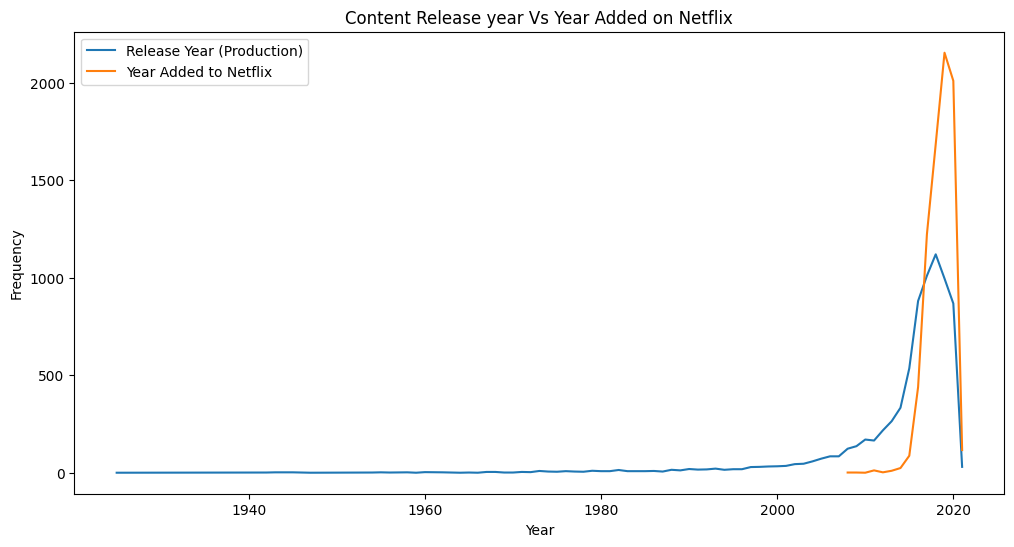

In [100]:
release_trends = netflix_db['release_year'].value_counts().sort_index()
added_trends = netflix_db['year_added'].value_counts().sort_index()

print('Oldest Content Alailable: ',netflix_db['release_year'].min(),'\nFirst Upload on Netflix: ',netflix_db['year_added'].min())
plt.figure(figsize=(12,6))
plt.plot(release_trends.index, release_trends.values, label="Release Year (Production)")
plt.plot(added_trends.index, added_trends.values, label="Year Added to Netflix")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Content Release year Vs Year Added on Netflix")
plt.legend()
plt.show()

Q4:  Who are the top directors on Netflix?

<Axes: title={'center': 'Top 16 Dirctors'}, xlabel='director'>

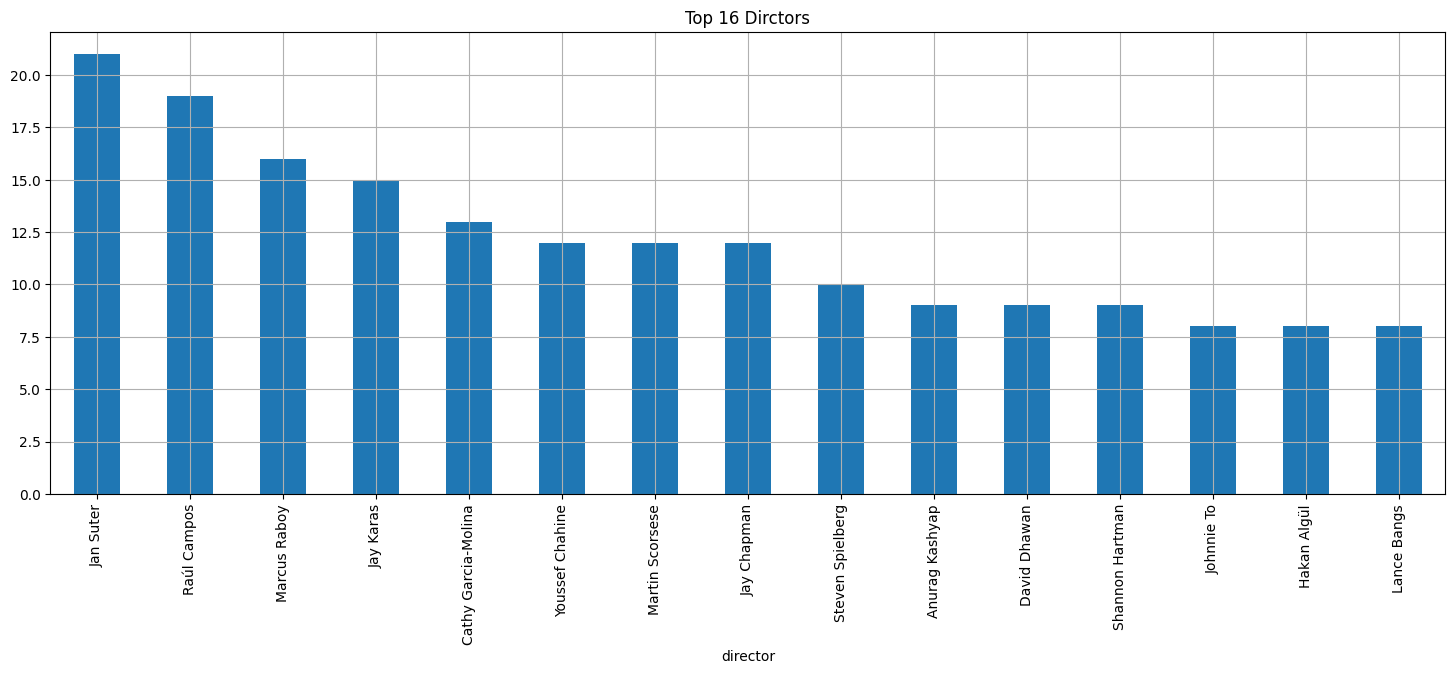

In [ ]:
plt.figure(figsize=(18,6))
plt.title("Top 16 Dirctors")
netflix_db['director'].str.split(', ').explode('director').value_counts()[1:16].plot(kind='bar', grid= True)

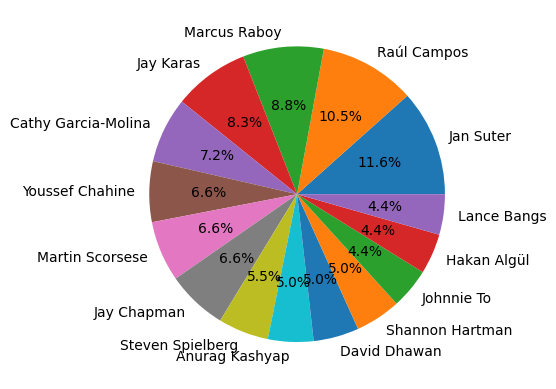

In [91]:
netflix_db['director'].str.split(', ').explode('director').value_counts()[1:16].plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.show()

- Jan Suter has diected more than 20+ movies and tv shows, making him the top most director. Followed by Pahul Campos with 18+ contents direcred by him. 

Q5: What are the most common word pairs or phrases in content descriptions?

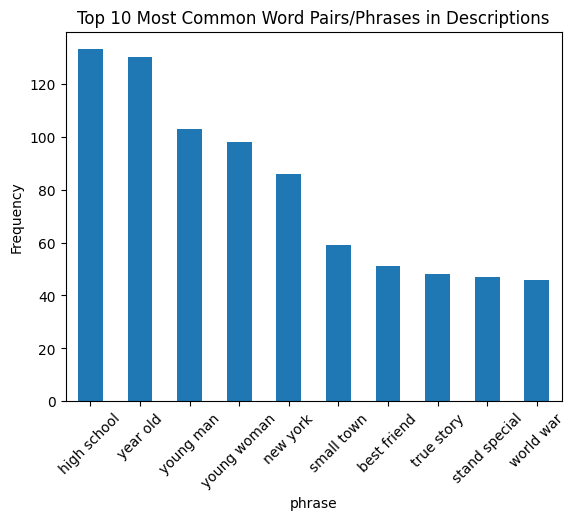

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

descriptions = netflix_db['description'].dropna().tolist()
vectorizer = CountVectorizer(ngram_range=(2,5), stop_words='english')
X = vectorizer.fit_transform(descriptions)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame for plotting
df_phrases = pd.DataFrame(words_freq, columns=['phrase', 'frequency'])
df_phrases.plot.bar(x='phrase', y='frequency', legend=False)
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Word Pairs/Phrases in Descriptions')
plt.xticks(rotation=45)
plt.show()
